In [4]:
import pandas as pd

df = pd.read_csv('/content/accepted_2007_to_2018Q4.csv', low_memory=False, on_bad_lines='skip')

print(df.shape)
df.head()


(12617, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_original = df.copy()
df.drop(columns=['id', 'member_id'], inplace=True, errors='ignore')

# Check top 25 columns by missing percentage
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(25)


,0
sec_app_open_act_il,1.000000
sec_app_inq_last_6mths,1.000000
sec_app_open_acc,1.000000
sec_app_mort_acc,1.000000
sec_app_mths_since_last_major_derog,1.000000
sec_app_collections_12_mths_ex_med,1.000000
sec_app_chargeoff_within_12_mths,1.000000
sec_app_num_rev_accts,1.000000
sec_app_earliest_cr_line,1.000000
sec_app_revol_util,1.000000


In [7]:
# Drop columns with >90% missing values
threshold = 0.90
missing = df.isnull().mean()
cols_to_drop = missing[missing > threshold].index

df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped {len(cols_to_drop)} columns.")
print(f"Remaining shape: {df.shape}")



Dropped 0 columns.
Remaining shape: (12617, 112)


In [8]:
df['loan_status'].value_counts(dropna=False)


,count
loan_status,
Fully Paid,8980
Charged Off,2199
Current,1336
Late (31-120 days),63
In Grace Period,32
Late (16-30 days),5
NaN,2


In [9]:
# Keep only 'Fully Paid' and 'Charged Off'
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Encode binary target
df['loan_status_binary'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

print(df['loan_status_binary'].value_counts())
print(f"Remaining shape: {df.shape}")


loan_status_binary
0    8980
1    2199
Name: count, dtype: int64
Remaining shape: (11179, 113)


<ipython-input-9-671b39c0deca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status_binary'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})


In [10]:
selected_features = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc',
    'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
    'total_acc', 'recoveries', 'collection_recovery_fee'
]

# Filter dataset
df_selected = df[selected_features + ['loan_status_binary']].copy()
print(df_selected.shape)
df_selected.head()


(11179, 16)


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collection_recovery_fee,loan_status_binary
0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,0
1,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,0
2,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,0
4,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0
5,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,0


In [11]:
df_selected.isnull().sum()


,0
loan_amnt,0
int_rate,0
installment,0
annual_inc,0
dti,0
delinq_2yrs,0
fico_range_low,0
fico_range_high,0
open_acc,0
pub_rec,0


In [12]:
df_selected['dti'] = df_selected['dti'].fillna(df_selected['dti'].median())
df_selected['revol_util'] = df_selected['revol_util'].fillna(df_selected['revol_util'].median())


In [13]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X = df_selected.drop('loan_status_binary', axis=1)
y = df_selected['loan_status_binary']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mi_scores = mutual_info_classif(X_scaled, y, discrete_features=False)

# Create a DataFrame of results
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print(mi_df.head(10))  # Top 10 features


                    Feature  MI Score
13               recoveries  0.276068
14  collection_recovery_fee  0.275767
1                  int_rate  0.046523
2               installment  0.031949
6            fico_range_low  0.013297
7           fico_range_high  0.012708
9                   pub_rec  0.007322
3                annual_inc  0.005339
0                 loan_amnt  0.005035
4                       dti  0.004812


<ipython-input-14-d4663f5250b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df.head(15), x='MI Score', y='Feature', palette='viridis')


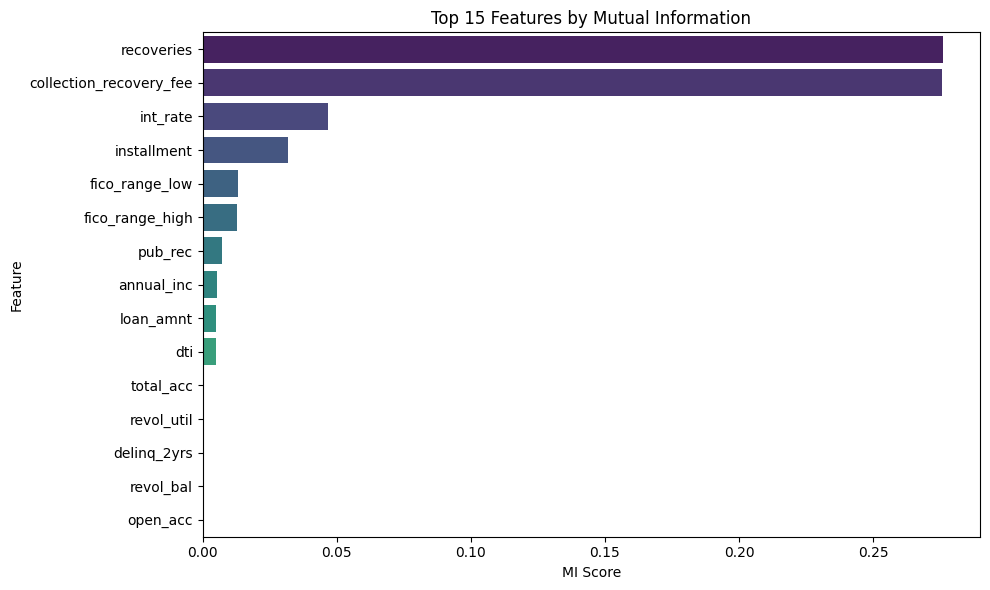

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df.head(15), x='MI Score', y='Feature', palette='viridis')
plt.title('Top 15 Features by Mutual Information')
plt.tight_layout()
plt.show()


In [15]:
# Keep only features with MI score > 0.01
selected_features = mi_df[mi_df['MI Score'] > 0.01]['Feature'].tolist()
print("Selected Features:", selected_features)

# Subset the dataset
X_selected = df_selected[selected_features]
y = df_selected['loan_status_binary']


Selected Features: ['recoveries', 'collection_recovery_fee', 'int_rate', 'installment', 'fico_range_low', 'fico_range_high']


In [18]:
# 1. Selected Features (from MI analysis)
selected_features = [
    'recoveries',
    'collection_recovery_fee',
    'int_rate',
    'installment',
    'fico_range_low',
    'fico_range_high'
]

# 2. Include the target column
final_features = selected_features + ['loan_status_binary']

# 3. Create the final subset
df_subset = df_selected[final_features].copy()

# 4. Check for any missing values
missing = df_subset.isnull().sum()
print("Missing values before cleaning:\n", missing)

# 5. Fill or drop if necessary (based on context, we fill here)
df_subset['recoveries'] = df_subset['recoveries'].fillna(0)
df_subset['collection_recovery_fee'] = df_subset['collection_recovery_fee'].fillna(0)

# 6. Final check
print("\n✅ Final subset ready. Shape:", df_subset.shape)
print(df_subset.head())


Missing values before cleaning:
 recoveries                 0
collection_recovery_fee    0
int_rate                   0
installment                0
fico_range_low             0
fico_range_high            0
loan_status_binary         0
dtype: int64

✅ Final subset ready. Shape: (11179, 7)
  recoveries  collection_recovery_fee  int_rate  installment  fico_range_low  \
0        0.0                      0.0     13.99       123.03           675.0   
1        0.0                      0.0     11.99       820.28           715.0   
2        0.0                      0.0     10.78       432.66           695.0   
4        0.0                      0.0     22.45       289.91           695.0   
5        0.0                      0.0     13.44       405.18           690.0   

   fico_range_high  loan_status_binary  
0            679.0                   0  
1            719.0                   0  
2            699.0                   0  
4            699.0                   0  
5            694.0      

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features and target
X = df_subset.drop('loan_status_binary', axis=1)
y = df_subset['loan_status_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
lr.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict
lr_preds = lr.predict(X_test_scaled)
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

# Evaluate
print("Logistic Regression:\n", classification_report(y_test, lr_preds))
print("Decision Tree:\n", classification_report(y_test, dt_preds))
print("Random Forest:\n", classification_report(y_test, rf_preds))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1796
           1       1.00      0.64      0.78       440

    accuracy                           0.93      2236
   macro avg       0.96      0.82      0.87      2236
weighted avg       0.94      0.93      0.92      2236

Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1796
           1       0.72      0.70      0.71       440

    accuracy                           0.89      2236
   macro avg       0.82      0.82      0.82      2236
weighted avg       0.89      0.89      0.89      2236

Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1796
           1       0.87      0.68      0.76       440

    accuracy                           0.92      2236
   macro avg       0.90      0.83      0.86      2236
weighted avg       0

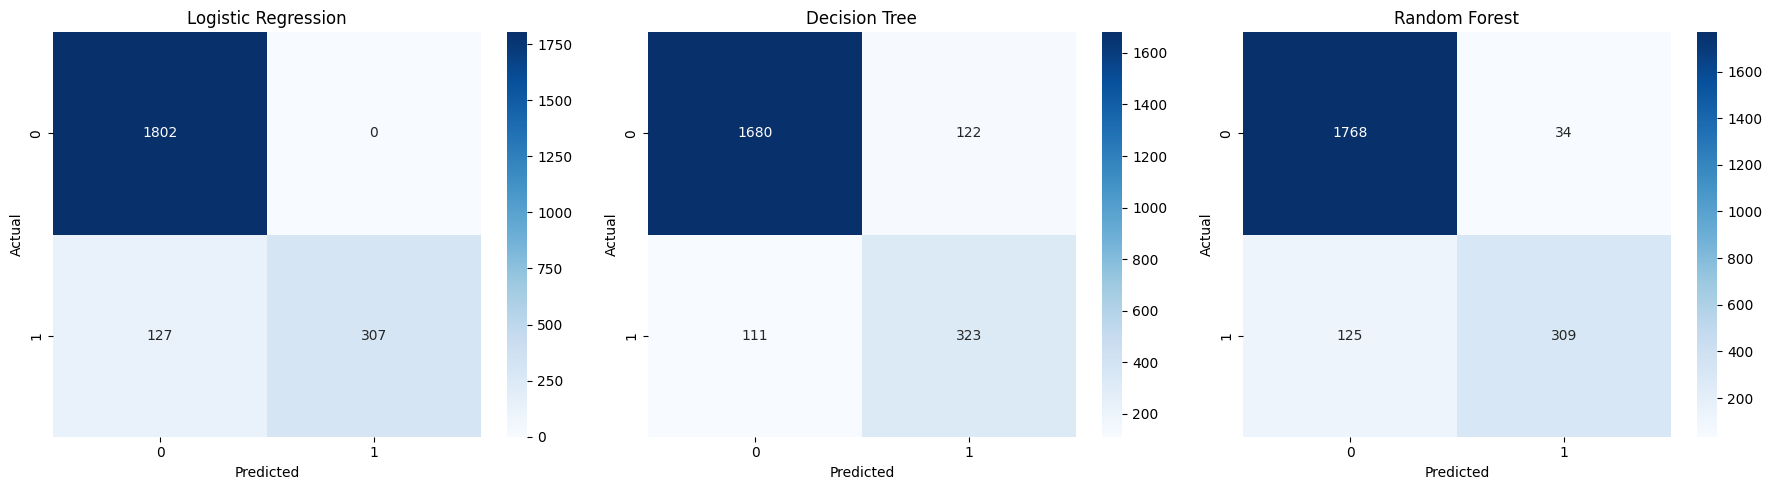

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Split the data again (if not already split)
from sklearn.model_selection import train_test_split
X = df_subset.drop('loan_status_binary', axis=1)
y = df_subset['loan_status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the models
log_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 3. Plot Confusion Matrices
models = {
    "Logistic Regression": log_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [23]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

print("🔁 Cross-Validation Scores (Accuracy - 5 folds):\n")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


🔁 Cross-Validation Scores (Accuracy - 5 folds):

Logistic Regression: 0.9395 ± 0.0025
Decision Tree: 0.8909 ± 0.0045
Random Forest: 0.9255 ± 0.0042


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

log_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train, y_train)
print("Best Logistic Regression Params:", log_grid.best_params_)
print("Best Accuracy:", log_grid.best_score_)

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Accuracy:", rf_grid.best_score_)


Best Logistic Regression Params: {'C': 0.01, 'penalty': 'l2'}
Best Accuracy: 0.9384998180529035
Best Random Forest Params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9384998180529035


In [26]:
import joblib

best_log_model = log_grid.best_estimator_
best_rf_model = rf_grid.best_estimator_

# Save the best models
joblib.dump(best_log_model, 'logistic_regression_model.pkl')
joblib.dump(best_rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

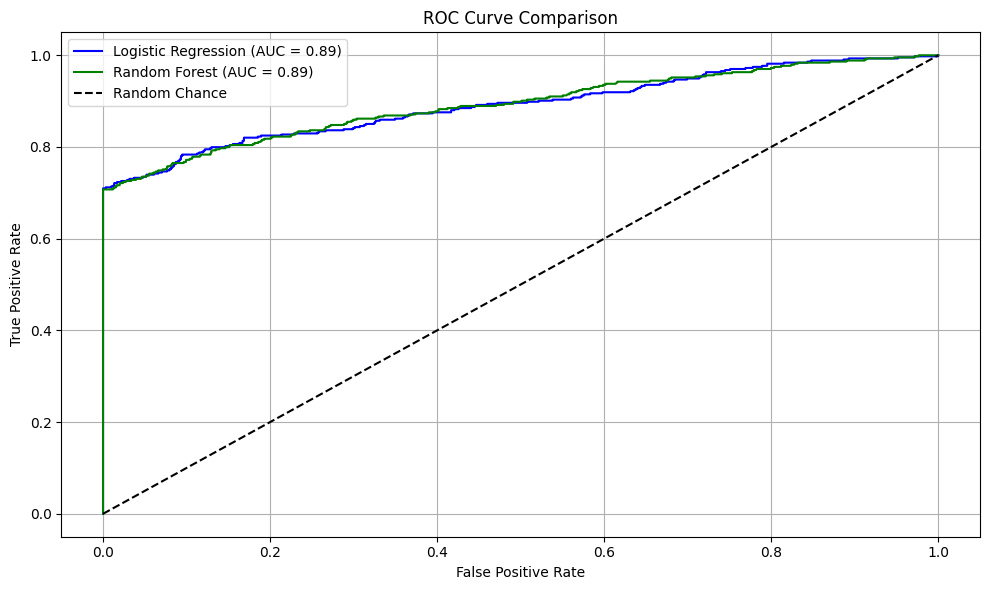

<ipython-input-27-8cd5901d6846>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='mako')


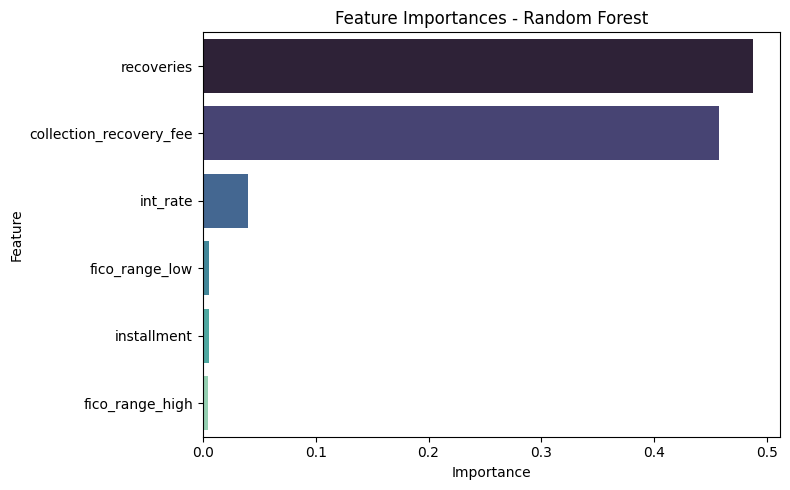

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Predict probabilities
log_probs = best_log_model.predict_proba(X_test)[:, 1]
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]

# ROC curves
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# AUC scores
log_auc = roc_auc_score(y_test, log_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


import pandas as pd
import seaborn as sns

# Get feature importances
importances = best_rf_model.feature_importances_
features = X.columns
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='mako')
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


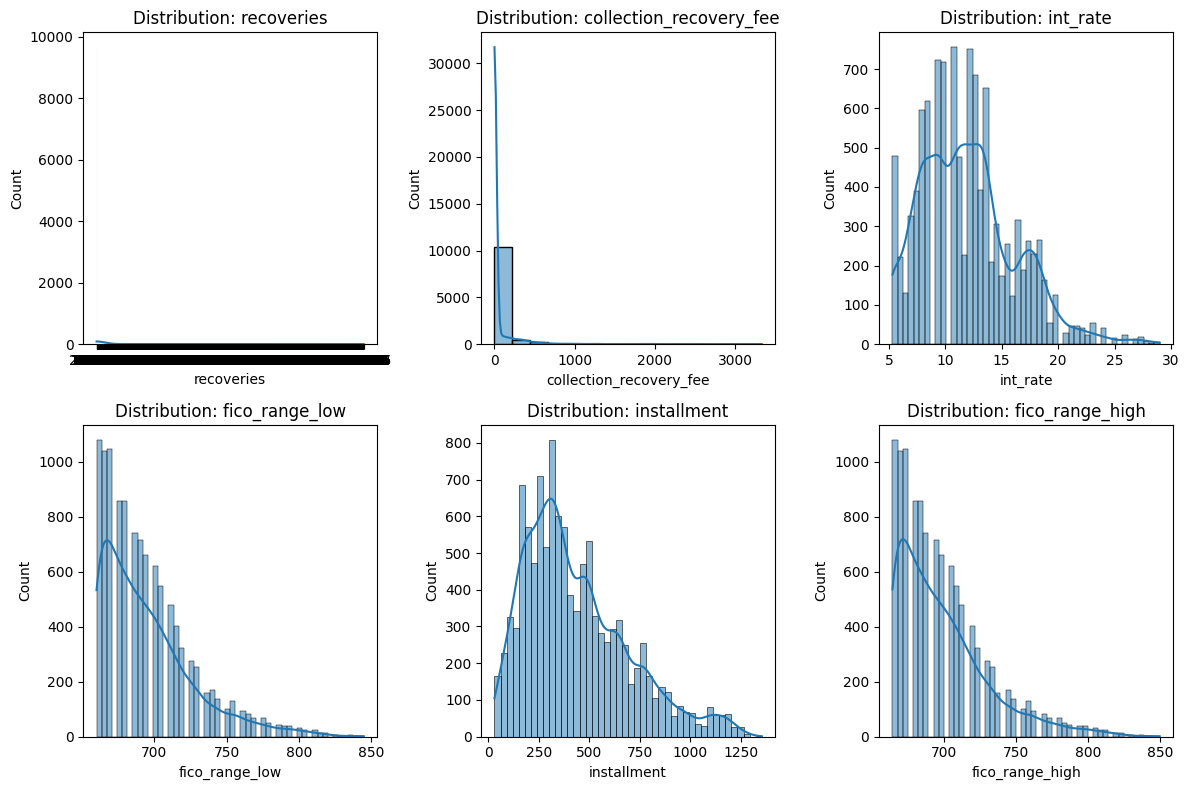

In [29]:
top_features = ['recoveries', 'collection_recovery_fee', 'int_rate', 'fico_range_low', 'installment', 'fico_range_high']

plt.figure(figsize=(12, 8))
for i, col in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution: {col}')
plt.tight_layout()
plt.show()


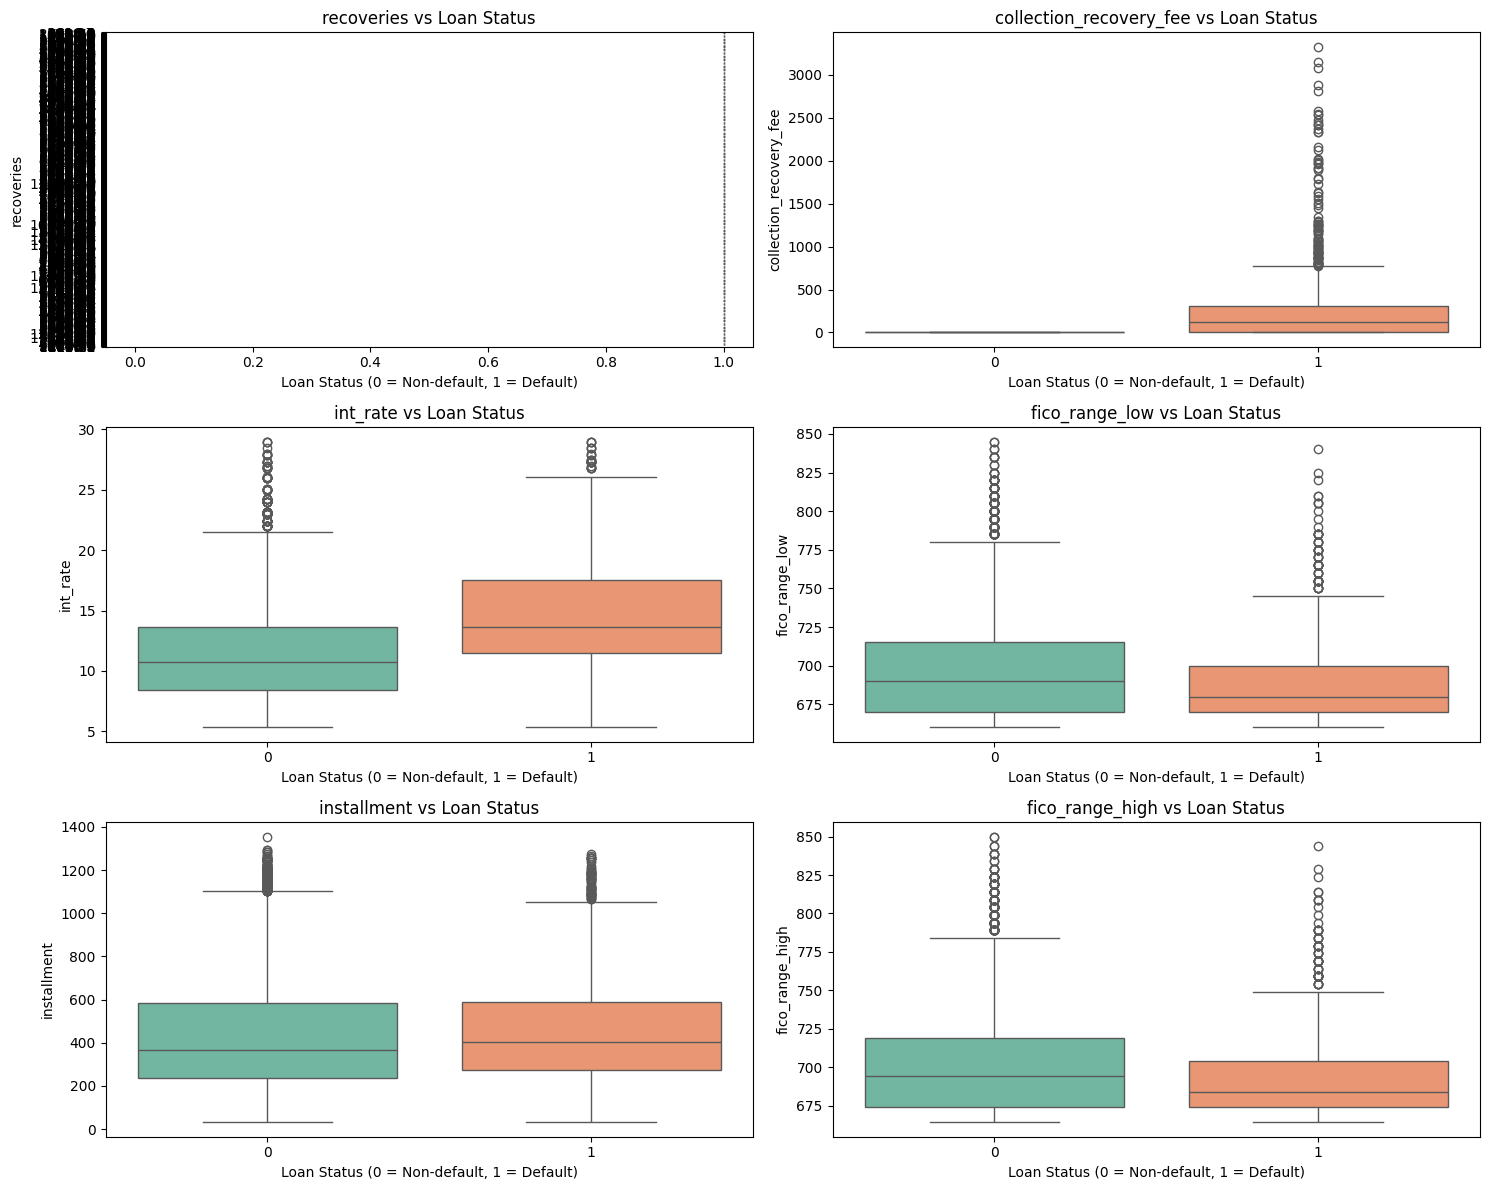

In [31]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(
        x='loan_status_binary',
        y=col,
        data=df,
        hue='loan_status_binary',  # Added
        palette='Set2',
        legend=False               # Suppress extra legend
    )
    plt.title(f'{col} vs Loan Status')
    plt.xlabel('Loan Status (0 = Non-default, 1 = Default)')
    plt.tight_layout()
plt.show()


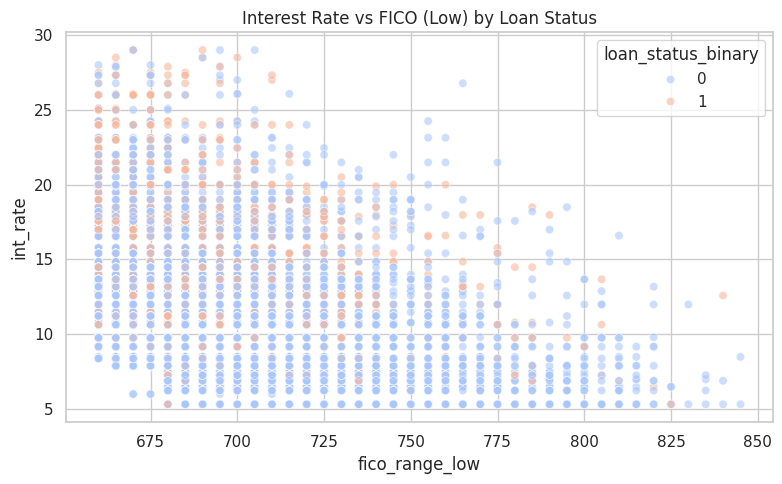

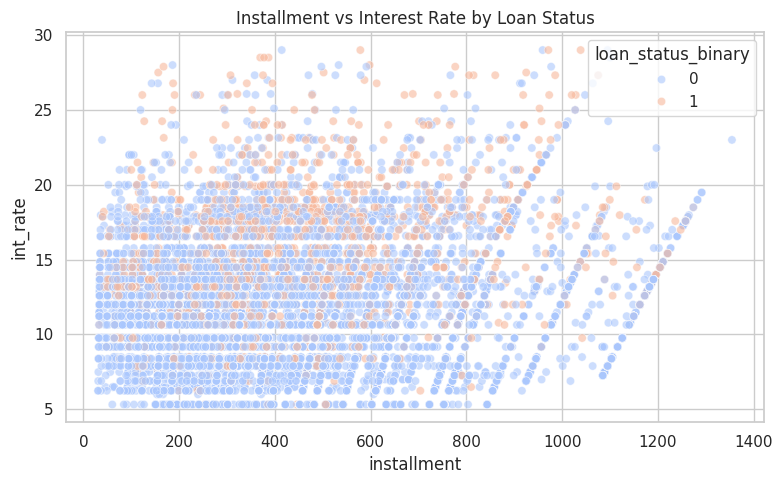

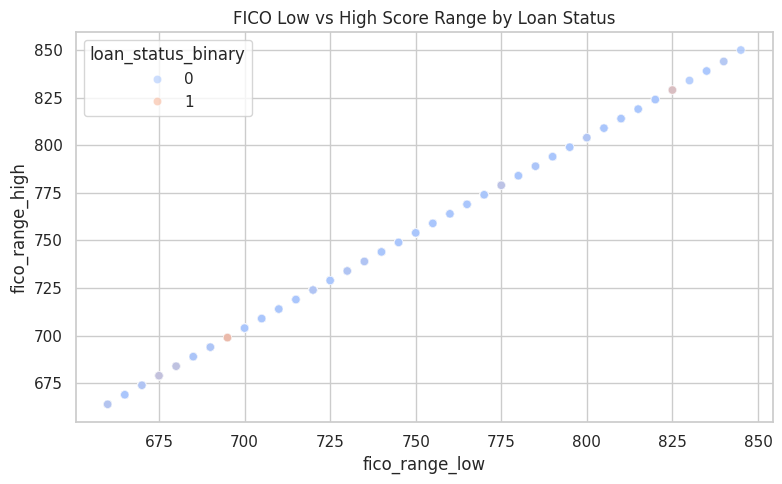

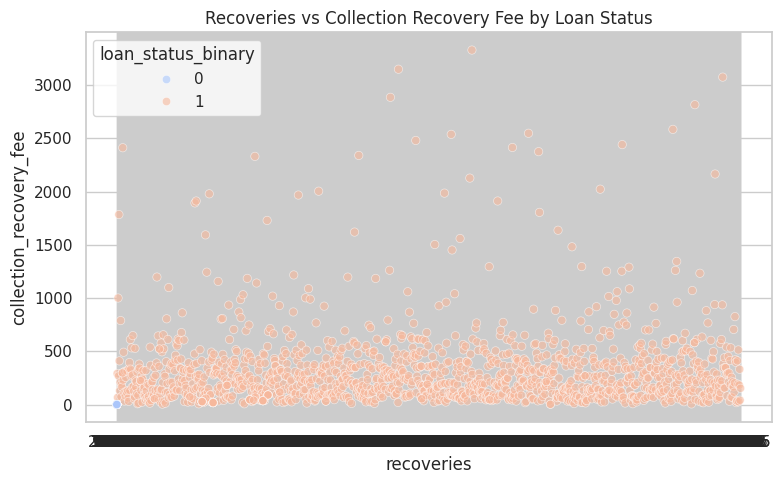

<ipython-input-32-8362aa0cc8e6>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status_binary', y='int_rate', data=df, palette='Set2')


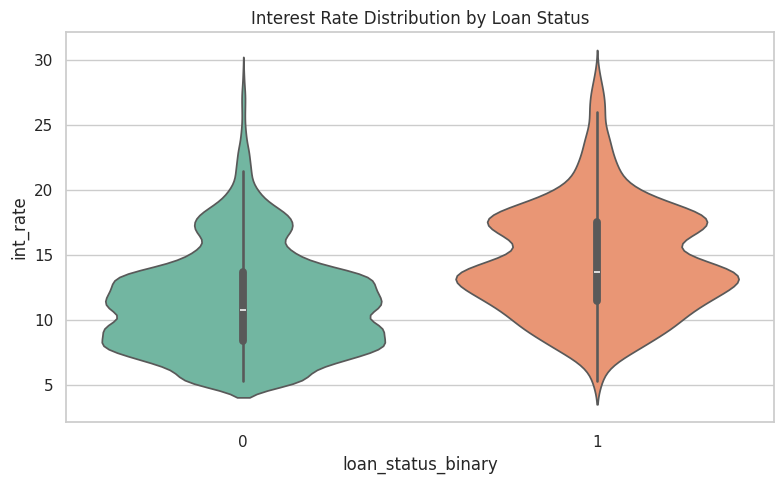

<ipython-input-32-8362aa0cc8e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status_binary', y='fico_range_low', data=df, palette='Set2')


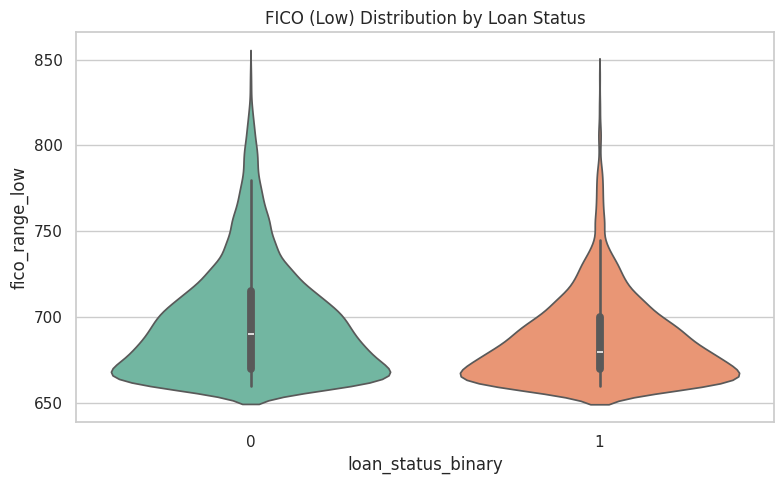

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. int_rate vs fico_range_low
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fico_range_low', y='int_rate', hue='loan_status_binary', data=df, palette='coolwarm', alpha=0.6)
plt.title('Interest Rate vs FICO (Low) by Loan Status')
plt.tight_layout()
plt.show()

# 2. installment vs int_rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x='installment', y='int_rate', hue='loan_status_binary', data=df, palette='coolwarm', alpha=0.6)
plt.title('Installment vs Interest Rate by Loan Status')
plt.tight_layout()
plt.show()

# 3. fico_range_low vs fico_range_high
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fico_range_low', y='fico_range_high', hue='loan_status_binary', data=df, palette='coolwarm', alpha=0.6)
plt.title('FICO Low vs High Score Range by Loan Status')
plt.tight_layout()
plt.show()

# 4. collection_recovery_fee vs recoveries
plt.figure(figsize=(8, 5))
sns.scatterplot(x='recoveries', y='collection_recovery_fee', hue='loan_status_binary', data=df, palette='coolwarm', alpha=0.6)
plt.title('Recoveries vs Collection Recovery Fee by Loan Status')
plt.tight_layout()
plt.show()

# 5. Violin plot - int_rate vs loan_status_binary
plt.figure(figsize=(8, 5))
sns.violinplot(x='loan_status_binary', y='int_rate', data=df, palette='Set2')
plt.title('Interest Rate Distribution by Loan Status')
plt.tight_layout()
plt.show()

# 6. Violin plot - fico_range_low vs loan_status_binary
plt.figure(figsize=(8, 5))
sns.violinplot(x='loan_status_binary', y='fico_range_low', data=df, palette='Set2')
plt.title('FICO (Low) Distribution by Loan Status')
plt.tight_layout()
plt.show()
